# Iris Dataset with K-Nearest Neighbors
Like many machine-learning algorithms, decision trees can be used for both classification and regression problems. When we implement the trees for regression, each time a new branch is created, the predicted value for the dependent variable will be the average of the observations that fall within it. Thus, the criterion to separate will be the one that minimizes the error between the real values and the predicted value.

### Load dataset


In [2]:
# General libraries and drive mounting
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import sklearn as sk

Scikit-learn modules for classification trees and metrics to evaluate our model:

In [3]:
# Specific modules for decision trees
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [4]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

## Exploratory Data Analysis

In [5]:
print('Dimension of the dataset: {}'.format(df.shape))
# Preview of the data
df.head(100)

Dimension of the dataset: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica).}



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
from funpymodeling.exploratory import status

status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,sepal length (cm),0,0.0,0,0.000000,35,float64
1,sepal width (cm),0,0.0,0,0.000000,23,float64
2,petal length (cm),0,0.0,0,0.000000,43,float64
3,petal width (cm),0,0.0,0,0.000000,22,float64
4,target,0,0.0,50,0.333333,3,float64


Analyze how many of each species we have to predict

## Construction of the model: Logistic Regression


#### A reminder:

$$P(y |x, \beta) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot x)}}$$

It is what we call the sigmoid function in the case of having a single feature

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio.

In [23]:
labels, counts = np.unique(df['target'], return_counts=True) # Función que devuelve las etiquetas y las frecuencias

print('Label {}'.format(labels))
print('Frequencies {}'.format(counts))

Label [0. 1. 2.]
Frequencies [50 50 50]


In [25]:
random_seed = 7
# Features we are gonna consider 
features = ['petal width (cm)']

# Variable we will predict
target = 'target'

# Construction of the matriz of features
X = df[features].to_numpy()

# Construction of the vector we are gonna predict
y = df[target].to_numpy()

In [30]:
# Creation of training and testing matrices 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=random_seed)
print('Dimension of the matrix of features for training: {}'.format(X_train.shape))
print('Dimension of the matrix of features for test: {}'.format(X_test.shape))

regLog = LogisticRegression(penalty = 'none')   

# And it's in training because it's supervised learning
regLog.fit(X_train,  y_train)

score_in_train = regLog.score(X_train, y_train) # Es el score del ajuste 

beta_0 = regLog.intercept_ # It's the method to obtain the beta 0 
beta_1 = regLog.coef_ # It's the method to obtain the beta 1

# Score of the model in the test set 
score_in_test = regLog.score(X_test, y_test)

print('Score in the train set: {}'.format(score_in_train))
print('Score in the test set: {}'.format(score_in_test))

Dimension of the matrix of features for training: (120, 1)
Dimension of the matrix of features for test: (30, 1)
Score in the train set: 0.9833333333333333
Score in the test set: 0.8666666666666667


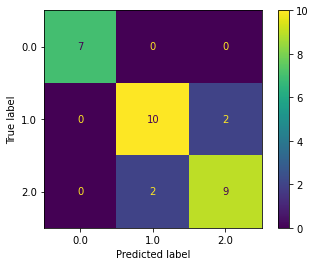

In [31]:
plot_confusion_matrix(regLog, X_test, y_test)  
plt.show()

## Add more variables to the analysis

In [50]:
# Matrix X
features = ['petal width (cm)', 'sepal length (cm)'] # Lista que contiene las features de interés

# Variables to predict
target = 'target'

# Construction of the matriz of features
X = df[features].to_numpy()

# Construction of the vextor to predict
y = df[target].to_numpy()

# Construction of the vector we are gonna predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=random_seed)
print('Dimension of the matrix of features for training: {}'.format(X_train.shape))
print('Dimension of the matrix of features for test: {}'.format(X_test.shape))

regLog = LogisticRegression(penalty = 'none') # We start the model once again
regLog.fit(X_train,  y_train)

score_in_train = regLog.score(X_train, y_train) # It is the score of the fit
beta_0 = regLog.intercept_ # Beta 0
beta_1 = regLog.coef_[0][0] # The coefficient beta_1
beta_2 = regLog.coef_[0][1] # The coefficient beta_2

# Score of the model in the test set 
score_in_test = regLog.score(X_test, y_test)

print('Score in the train set: {}'.format(score_in_train))
print('Score in the test set: {}'.format(score_in_test))

Dimension of the matrix of features for training: (120, 2)
Dimension of the matrix of features for test: (30, 2)
Score in the train set: 0.9833333333333333
Score in the test set: 0.9


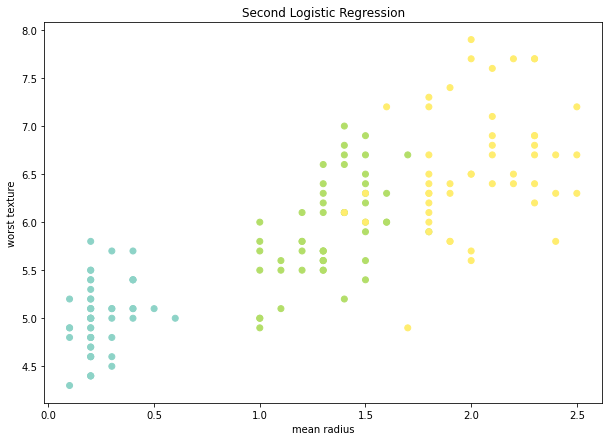

In [49]:
# Graph

fig, ax = plt.subplots(figsize = (10,7))

ax.set_title('Second Logistic Regression')
ax.scatter(X[:,0], # We plot the firs column of our X matrix, in this case: petal width (cm)
           X[:,1], #We plot the second column of our Y matrix, in this case: sepal length (cm)
           c = y, # We color the dots based on their real label
           cmap = 'Set3', # The color map
           )
ax.set_xlabel('mean radius') # Label axis X
ax.set_ylabel('worst texture') # Label axis Y

# Plot the curve here, it wouldn't be of much interest. Yes we could color an area as a representation of the function P: R² ---> R
# Let's plot the decision boundary


plt.show()